In [41]:
# This code was adapted from course material by Jenna Wiens (UMichigan).

import sys

In [42]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
# Please specify the full paths to the regression_train.csv
# and regression_test.csv files in your gdrive directory
### ========== TODO : START ========== ###
train_path = '/content/gdrive/My Drive/ps2/regression_train.csv'
test_path = '/content/gdrive/My Drive/ps2/regression_test.csv'
### ========== TODO : END ========== ###

In [44]:
# Use only the provided packages!
import os
import numpy as np
import matplotlib.pyplot as plt

In [45]:
######################################################################
# classes
######################################################################

class Data :

    def __init__(self, X=None, y=None) :
        """
        Data class.

        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y

    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.

        Parameters
        --------------------
            filename -- string, filename
        """

        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")

        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]

    def plot(self, **kwargs) :
        """Plot data."""

        if 'color' not in kwargs :
            kwargs['color'] = 'b'

        fig = plt.figure(figsize=(10, 5))
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [46]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [47]:
def plot_erms(mrange, train_errs, test_errs):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(mrange, train_errs, 'o-', color='red', label='Training')
    plt.plot(mrange, test_errs, 'o-', color='blue', label='Test')
    plt.xlabel(r'$m$', fontsize = 16)
    plt.ylabel(r'$E_{RMS}$', fontsize = 16)
    plt.title('Polynomial regression error')
    plt.legend()
    plt.show()

In [48]:
class PolynomialRegression() :

    def __init__(self, m=1) :
        """
        Ordinary least squares regression.

        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m


    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].

        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features

        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n,d = X.shape

        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        m = self.m_
        Phi = np.ones((n,m+1))
        for i in range(1,m+1):
          Phi[:,i] = X[:, 0]**i

        ### ========== TODO : END ========== ###

        return Phi


    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes

        Returns
        --------------------
            self    -- an instance of self
        """

        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()

        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration

        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/(1+(0.01*t))
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###

            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math

            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = X.dot(self.coef_)
            grad = -2 * X.T.dot(y-y_pred) / n
            self.coef_ -= eta*grad
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
            ### ========== TODO : END ========== ###

            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break

            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec

        print('number of iterations: %d' % (t+1))

        return self


    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        self.coef_ = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
        ### ========== TODO : END ========== ###


    def predict(self, X) :
        """
        Predict output for X.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features

        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part c: predict y
        y = X.dot(self.coef_)
        ### ========== TODO : END ========== ###

        return y


    def cost(self, X, y) :
        """
        Calculates the objective function.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        prediction = self.predict(X)
        cost = np.sum(np.power(y-prediction,2)) / len(y)
        ### ========== TODO : END ========== ###
        return cost


    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        error = np.sqrt(self.cost(X,y))
        ### ========== TODO : END ========== ###
        return error


    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'

        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


Visualizing data...


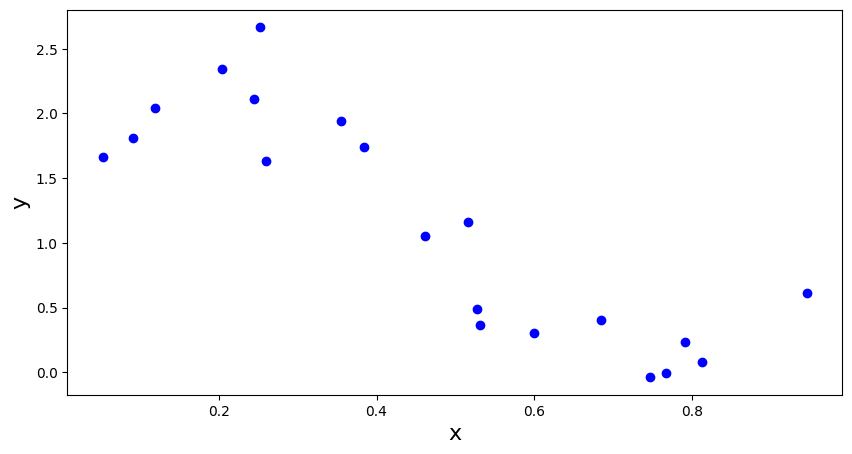

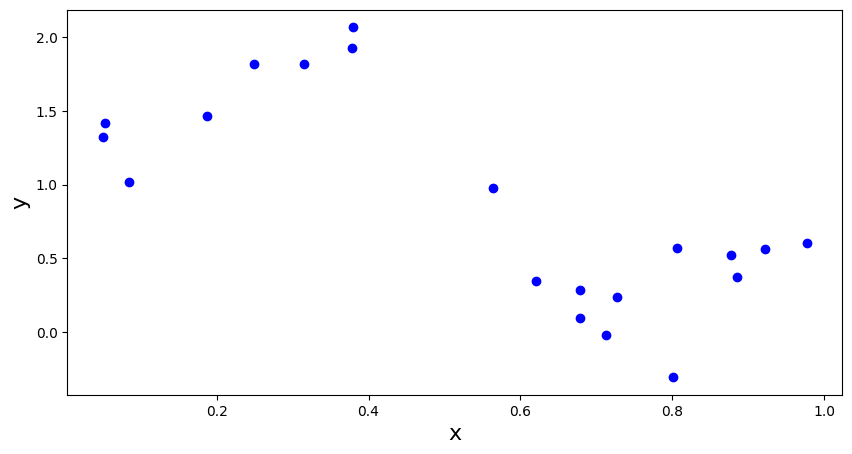

Investigating linear regression...
number of iterations: 347
Custom Coefficients: [ 2.44640703 -2.81635346]
Custom Cost: 0.1956288202895743
number of iterations: 10000
Learning rate: 1e-06
Coefficients: [0.02234673 0.00661274]
Final Cost: 1.95737930170977

number of iterations: 10000
Learning rate: 1e-05
Coefficients: [0.20225502 0.05585399]
Final Cost: 1.5692866620509913

number of iterations: 10000
Learning rate: 0.001
Coefficients: [ 1.91573585 -1.74358989]
Final Cost: 0.2746782794368013

number of iterations: 1467
Learning rate: 0.1
Coefficients: [ 2.44640696 -2.81635331]
Final Cost: 0.19562882028957834

Closed Form Coefficients: [ 2.44640709 -2.81635359]
Closed Form Cost: 0.19562882028957318
Investigating polynomial regression...


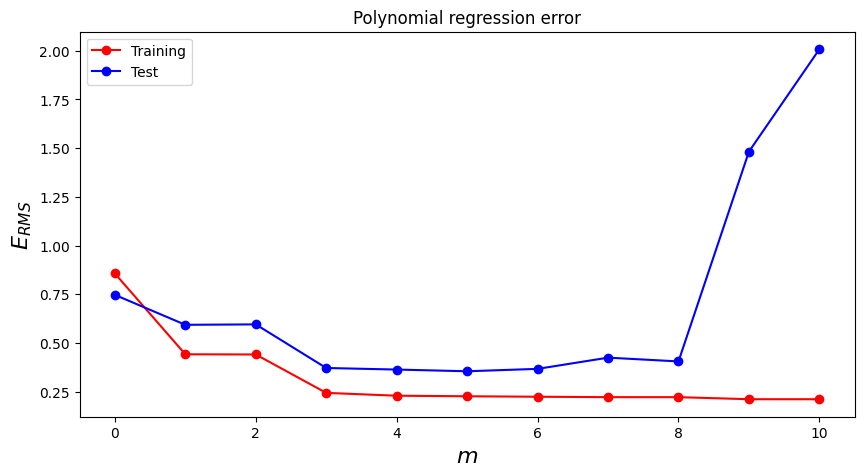

Done!


In [49]:
######################################################################
# main
######################################################################

def main():
    # load data
    train_data = load_data(train_path)
    test_data = load_data(test_path)


    ### ========== TODO : START ========== ###
    # part a: main code for visualizations

    print('Visualizing data...')

    plot_data(train_data.X,train_data.y)
    plot_data(test_data.X, test_data.y)
    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')
    model = PolynomialRegression(m=1)
    model.fit_GD(train_data.X,train_data.y, eta=None )
    print(f"Custom Coefficients: {model.coef_}")
    print(f"Custom Cost: {model.cost(train_data.X, train_data.y)}")
    lrs = [1e-6, 1e-5, 1e-3, 0.1]
    for eta in lrs:
      model = PolynomialRegression(m=1)
      model.fit_GD(train_data.X, train_data.y, eta=eta)
      print(f"Learning rate: {eta}")
      print(f"Coefficients: {model.coef_}")
      print(f"Final Cost: {model.cost(train_data.X, train_data.y)}\n")

    model = PolynomialRegression(m=1)
    model.fit(train_data.X,train_data.y)
    print(f"Closed Form Coefficients: {model.coef_}")
    print(f"Closed Form Cost: {model.cost(train_data.X, train_data.y)}")

    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')
    mrange = np.arange(0, 11)
    train_errs, test_errs = [], []

    for m in mrange:
       model = PolynomialRegression(m)
       model.fit(train_data.X, train_data.y)
       train_errs.append(model.rms_error(train_data.X, train_data.y))
       test_errs.append(model.rms_error(test_data.X, test_data.y))

    plot_erms(mrange, train_errs, test_errs)
    ### ========== TODO : END ========== ###


    print("Done!")

if __name__ == "__main__":
    main()
